In [1]:
import os
import cv2
import numpy as np

print('Great Success!!!')

Great Success!!!


In [2]:
# Func to show images for testing
def show_image(image):
    cv2.imshow('image',image)
    c = cv2.waitKey()
    if c >= 0 : return -1
    return 0

In [3]:
# Set up

data_folder = 'Math_Symbols\extracted_images'
image_class = os.listdir(data_folder)

# Function to read images
# squishes pixels in image either to black or white, then finds contours
# reshape image to be 28x28 pixels and reshape again to be 784x1 array

def load_images(folder):
    data = []
    for fname in os.listdir(folder)[:10]:
        img_path = os.path.join(folder, fname)
        image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if image is not None:
            # squish pixels to black or white
            ret, thresh = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)
            contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
            # RETR_EXTERNAL: Extract only outer contours
            # CHAIN_APPROX_NONE: Stores ALL points on contour
            count = sorted(contours, key=lambda ctr: cv2.boundingRect(ctr)[0])
            w, h = 28, 28  # Width, Height
            maxi = 0
            for c in count:
                x, y, w, h = cv2.boundingRect(c)
                maxi = max(w*h, maxi)
                if maxi == w*h:
                    x_max, y_max = x, y
                    w_max, h_max = w, h
            im_crop = thresh[y_max:y_max+h_max+10, x_max:x_max+w_max+10]
            im_resize = cv2.resize(im_crop, (28, 28))
            #im_resize = np.reshape(im_resize, (784, 1))
            data.append(im_resize)
    return data


In [4]:
# Label each math symbol

symbol_to_label = {
                   '0':0, '1':1, '2':2, '3':3, '4':4, '5':5, '6':6, '7':7, '8':8, '9':9,
                   'A':10, 'b':11, 'C':12, 'd':13, 'e':14, 'f':15, 'G':16, 'H':17,
                   'i':18, 'j':19, 'k':20, 'l':21, 'M':22, 'N':23, 'o':24, 'p':25, 
                   'q':26, 'R':27, 'S':28, 'T':29, 'u':30, 'v':31, 'w':32, 'X':33, 
                   'y':34, 'z':35, 'alpha':36, 'beta':37, 'Delta':38, 'gamma': 39,
                   'lambda':40, 'mu':41, 'phi':42, 'pi':43, 'sigma':44, 'theta':45,
                   'cos':46, 'sin':47, 'tan':48, '+':49, '-':50, 'times':51, 'div':52,
                   'int':53, 'pm':54, 'geq':55, 'gt':56, 'leq':57, 'lt':58, 'neq':59,
                   'sqrt':60, 'exists':61, 'forall':62, 'lim':63, 'log':64, 'prime':65,
                   'rightarrow':66, 'infty':67, 'forward_slash':68, '!':69, '(':70,
                   ')':71, ',':72, '[':73, ']':74, '{':75, '}':76, 'ascii_124':78,
                   'in':79, 'ldots':80, 'sum':81, '=':82
                   }

label_to_symbol = dict([(val, key) for key, val in symbol_to_label.items()])

In [5]:
test1_fpath = 'Math_Symbols\extracted_images\='
test1 = load_images(test1_fpath)

In [ ]:
test2_fpath = r"Math_Symbols\extracted_images\0"
test2 = load_images(test2_fpath)

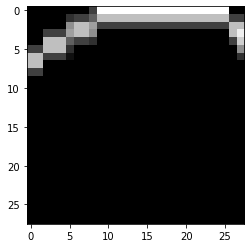

In [11]:
import matplotlib.pyplot as plt 

plt.close(1);plt.figure(1)

plt.imshow(test1[2], cmap='gray')
plt.show()

In [202]:
data = load_images('Math_Symbols\extracted_images\-')
minus = symbol_to_label['-']
for i in range(0, len(data)):
    data[i] = np.append(data[i], minus)
    
    
for symbol_folder in os.listdir(data_folder)[1:]:
    folder_path = os.path.join(data_folder, symbol_folder)
    label = symbol_to_label[symbol_folder]
    symbol_data = load_images(folder_path)
    
    for i in range(0, len(symbol_data)):
        symbol_data[i] = np.append(symbol_data[i], label)
    
    data = np.concatenate((data,symbol_data))

    

In [203]:
len(data)

408671

In [205]:
import pandas as pd

df = pd.DataFrame(data, index=None)
df.to_csv('MathSymbolsData.csv', index=False)

In [209]:
# Due 

to_keep_sym = [
    '0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
    '+', '-', 'times', 'div', '=',  'X', 'y',
]
to_keep_label = [symbol_to_label[i] for i in to_keep_sym]
test_df = df[df[784].isin(to_keep_label)]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 49, 50, 51, 52, 82, 33, 34]

In [237]:
FirstModel_df = pd.DataFrame(columns=df.columns)

for i in range(0,200000,2000):
    row_label = df.iloc[i,784]
    if row_label in to_keep_label:
 
        row = df.iloc[i]
        FirstModel_df.append(row)
    

In [239]:
test_df = df[df[784].isin(to_keep_label)]

In [247]:
test_df.to_csv('FirstModel/data.csv',index=None)
test_df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240520 entries, 0 to 400489
Columns: 785 entries, 0 to 784
dtypes: int32(785)
memory usage: 722.1 MB
